In [135]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Spark K-means  1-1-1 (p-b-c)

throughput = lastReceivedBatch_records/ (lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime) <br>
Parameters: Streaming window: 60 seconds, Number of cluster centroids, Number  of data points <br>

In [136]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-1-1-20170810-043115/spark_consumer'
app = '/app-20170810080542-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)

In [137]:
throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0
# start_time1498774108 



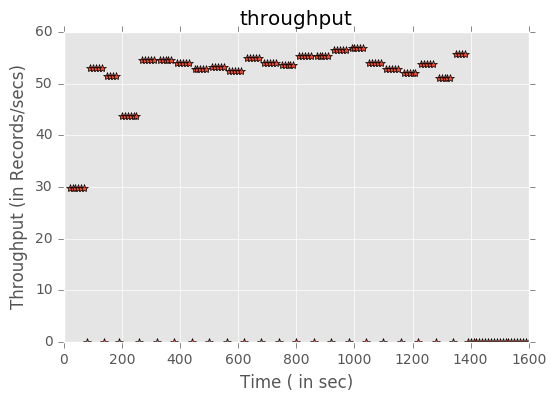

In [138]:
x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1502370352

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time

#plt.xticks()
plt.xlim(0,1600)
plt.plot(x_values,throughput,'*')
plt.ylabel('Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("throughput")
#plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')

### producers

In [139]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-1-1-20170810-043115/producer'

In [140]:
p1 = pd.read_csv(directory +'/kafka-throughput-producer-20170810-043115.csv',skipinitialspace=True)
p2 = pd.read_csv(directory + '/stdout-20170810-043115.csv',skipinitialspace=True)
p1

,Number_Clusters,Number_Points_per_Cluster,Number_Dim,Number_Points_per_Message,Interval,Number_Partitions,Time
0,100,100,3,8000,0,48,0.446
1,100,1000,3,8000,0,48,1.132
2,100,10000,3,8000,0,48,11.947
3,100,100000,3,8000,0,48,124.058


In [141]:
p2

,Produce_batch_Start,Produce_batch_End,Num_Messages,Number_APoints/Msg,KB_Transfered,KB/sec
0,0,8000,0,8000,0.000,0.000
1,0,8000,1,8000,494.000,1016.974
2,8000,16000,2,8000,989.000,1612.304
3,16000,24000,3,8000,1490.000,2174.164
4,24000,32000,4,8000,1984.000,2598.481
5,32000,40000,5,8000,2478.000,2887.338
6,40000,48000,6,8000,2975.000,3117.942
7,48000,56000,7,8000,3469.000,3310.560
8,56000,64000,8,8000,3965.000,3470.144
9,64000,72000,9,8000,4462.000,3469.140


# K-means : 2-1-2 (p-b-c)

In [142]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/2-1-2-20170810-092604/spark-consumer'
app = '/app-20170810092602-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)

In [143]:
throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0
# start_time1498774108 

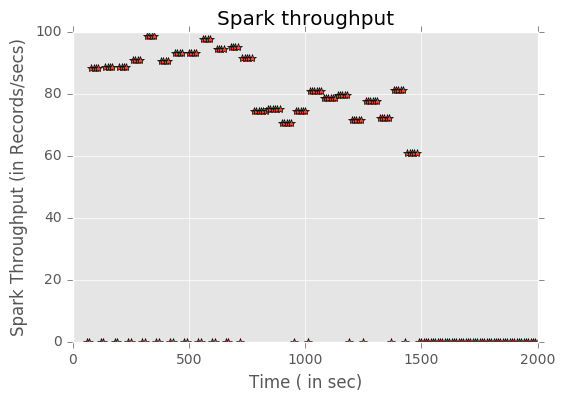

In [144]:
x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1502375172

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time

#plt.xticks()
plt.xlim(0,2000)
plt.plot(x_values,throughput,'*')
plt.ylabel('Spark Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("Spark throughput")
#plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')

## producers

In [145]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/2-1-2-20170810-092604/producers'

In [146]:
p1_1 = pd.read_csv(directory +'/kafka-throughput-producer-20170810-092604.csv',skipinitialspace=True)
p1_2 = pd.read_csv(directory + '/stdout-20170810-092604.csv',skipinitialspace=True)

#### Producer No1

In [147]:
p1_1

,Number_Clusters,Number_Points_per_Cluster,Number_Dim,Number_Points_per_Message,Interval,Number_Partitions,Time
0,100,100,3,8000,0,48,0.061
1,100,1000,3,8000,0,48,0.905
2,100,10000,3,8000,0,48,7.493
3,100,100000,3,8000,0,48,60.574
4,100,1000000,3,8000,0,48,627.824


In [148]:
p1_2.head()

,Produce_batch_Start,Produce_batch_end,Num_Messages,Number_APoints/Msg,KB_Transfered,KB/sec
0,0,8000,0,8000,0.000,0.000
1,0,8000,1,8000,494.000,6336.504
2,8000,16000,2,8000,983.000,5887.882
3,16000,24000,3,8000,1484.000,4838.936
4,24000,32000,4,8000,1981.000,4953.379


#### Producer 2

In [149]:
p2_1 = pd.read_csv(directory +'/kafka-throughput-producer-20170810-092613.csv',skipinitialspace=True)
p2_2 = pd.read_csv(directory + '/stdout-20170810-092613.csv',skipinitialspace=True)

In [150]:
p2_1

,Number_Clusters,Number_Points_per_Cluster,Number_Dim,Number_Points_per_Message,Interval,Number_Partitions,Time
0,100,100,3,8000,0,48,0.318
1,100,1000,3,8000,0,48,1.027
2,100,10000,3,8000,0,48,11.841
3,100,100000,3,8000,0,48,119.123
4,100,1000000,3,8000,0,48,1264.330


In [151]:
p2_2.head()

,Produce_batch_Start,Produce_batch_end,Num_Messages,Number_APoints/Msg,KB_Transfered,KB/sec
0,0,8000,0,8000,0.000,0.000
1,0,8000,1,8000,497.000,1389.456
2,8000,16000,2,8000,996.000,2339.105
3,16000,24000,3,8000,1491.000,2998.987
4,24000,32000,4,8000,1989.000,3458.427
